In [156]:
!python -m pip install scipy
!python -m pip install matplotlib
!python -m pip install sortedcontainers
!python -m pip install dataclasses
!python -m pip install statsmodels

You should consider upgrading via the '/home/grosedj/python-envs/winstats/env/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/grosedj/python-envs/winstats/env/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/grosedj/python-envs/winstats/env/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/grosedj/python-envs/winstats/env/bin/python -m pip install --upgrade pip' command.
  Using cached statsmodels-0.13.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.9 MB)
  Using cached pandas-1.4.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)
You should consider upgrading via the '/home/grosedj/python-envs/winstats/env/bin/python -m pip install --upgrade pip' command.


In [2]:
from sortedcontainers import SortedList

In [3]:
from collections import deque

In [4]:
import dataclasses

In [5]:
import unittest

In [161]:
@dataclasses.dataclass
class OSW :
    size : int
    OST : SortedList
    W : deque
    def __init__(self,size) :
        self.size = size
        self.OST = SortedList()
        self.W = deque([],size+1)
    def push(self,x) :
        self.W.append(x)
        popped = None
        if len(self.W) > self.size :
            self.OST.remove(self.W[0])
            popped = self.W.popleft()
        index = self.OST.bisect_left(x)
        self.OST.add(x)
        return (index,popped)
    def bisect_left(self,x) :
        if len(self.OST) == 0 :
            return (0,None)
        index = self.OST.bisect_left(x)
        if index == len(self.OST) :
            return (index,None)
        return (index,self.OST[index])
    def bisect_right(self,x) :
        if len(self.OST) == 0 :
            return (0,None)
        index = self.OST.bisect_right(x)
        if index == 0 :
            return (index,None)
        return (index,self.OST[index-1])
    def __getitem__(self,i) :
        return self.OST[i]
    def __len__(self) :
        return len(self.W)
        

  

In [7]:
from scipy.stats import median_abs_deviation
from math import floor,ceil


In [8]:
def mad(T) :
    if len(T) == 1 :
        return 0
    mu = (T[ceil(len(T)/2) - 1] + T[floor(len(T)/2)])/2
    a = 0
    b = floor(len(T)/2) - 1
    c = ceil(len(T)/2)
    d = len(T) - 1  
   
    def bisect(T,Ix,Iy,mu) :
        a,b = Ix
        c,d = Iy
        if b - a < 2 :
            if len(T) % 2 == 0 :
                return (max(mu-T[b],T[c]-mu) + min(mu-T[a],T[d]-mu))/2
            else :
                return min(max(mu-T[b],T[c]-mu),min(mu-T[a],T[d]-mu))
        (a,b) = (a + floor((b-a)/2), a + ceil((b-a)/2)) 
        (c,d) = (c + floor((d-c)/2), c + ceil((d-c)/2))
        if 4*mu > T[a] + T[b] + T[c] + T[d] :
            Ix = (a,Ix[1])
            Iy = (c,Iy[1])
        else :
            Ix = (Ix[0],b)
            Iy = (Iy[0],d)
        return bisect(T,Ix,Iy,mu)
    return bisect(T,(a,b),(c,d),mu)

In [9]:
from random import random

In [10]:
diff = []
for i in range(200) :
    osw = OSW(5001)
    X = [random() for j in range(5001)]
    for x in X :
        osw.push(x)
    diff.append(mad(osw)- median_abs_deviation(X))

diff = [d for d in diff if d != 0]

print(diff)

[]


In [11]:
class test_OSW(unittest.TestCase) :
    def test_push(self) :
        osw = OSW(4)
        X = [1,3,2,4,3,5,4,6,5,7]
        for x in X :
            osw.push(x)
        self.assertEqual(osw.OST,[4,5,6,7])
    def test_index(self) :
        osw = OSW(4)
        X = [1,3,2,4,3,5,4,6,5,7]
        for x in X :
            osw.push(x)
        self.assertEqual(osw.__getitem__(2),6)
    def test_index_out_of_bounds(self) :
        osw = OSW(4)
        self.assertRaises(IndexError,osw.__getitem__,0)
        osw.push(1)
        self.assertEqual(osw.__getitem__(0),1)
        X = [1,3,2,4,3,5,4,6,5,7]
        for x in X :
            osw.push(x)
        self.assertRaises(IndexError,osw.__getitem__,4)
    def test_bisect_left(self) :
        osw = OSW(4)
        (index,upperbound) = osw.bisect_left(3.14)
        self.assertEqual(index,0)
        self.assertIsNone(upperbound)
        self.assertEqual(osw.OST,[])
        osw.push(3.14)
        (index,upperbound) = osw.bisect_left(2.14)
        self.assertEqual(index,0)
        self.assertEqual(upperbound,3.14)
        self.assertEqual(osw.OST,[3.14])
        (index,upperbound) = osw.bisect_left(4.14)
        self.assertEqual(index,1)
        self.assertIsNone(upperbound)
        self.assertEqual(osw.OST,[3.14])
        (index,upperbound) = osw.bisect_left(3.14)
        self.assertEqual(index,0)
        self.assertEqual(upperbound,3.14)
        self.assertEqual(osw.OST,[3.14])
        osw.push(5.14)
        self.assertEqual(osw.OST,[3.14,5.14])
        (index,upperbound) = osw.bisect_left(4.14)
        self.assertEqual(index,1)
        self.assertEqual(upperbound,5.14)
        osw.push(5.14)
        self.assertEqual(osw.OST,[3.14,5.14,5.14])
        (index,upperbound) = osw.bisect_left(5.14)
        self.assertEqual(index,1)
        self.assertEqual(upperbound,5.14)
    def test_len(self) :
        osw = OSW(4)
        self.assertEqual(len(osw),0)
        osw.push(1.14)
        self.assertEqual(len(osw),1)
        osw.push(2.14)
        self.assertEqual(len(osw),2)
        osw.push(3.14)
        self.assertEqual(len(osw),3)
        osw.push(4.14)
        self.assertEqual(len(osw),4)
        osw.push(5.14)
        self.assertEqual(len(osw),4)
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_bisect_left (__main__.test_OSW) ... ok
test_index (__main__.test_OSW) ... ok
test_index_out_of_bounds (__main__.test_OSW) ... ok
test_len (__main__.test_OSW) ... ok
test_push (__main__.test_OSW) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.002s

OK


In [12]:
osw = OSW(10)
for i in range(101010) :
    osw.push(random())
print(osw)
index,upper_bound = osw.bisect_left(2.1)
print(index)
print(upper_bound)

OSW(size=10, OST=SortedList([0.00962724934101944, 0.03726347781007722, 0.14821398912597827, 0.23279525786918231, 0.2598109661532142, 0.5234505104977512, 0.7723342701310735, 0.822693445741112, 0.830733179811122, 0.9946230933063175]), W=deque([0.2598109661532142, 0.822693445741112, 0.23279525786918231, 0.5234505104977512, 0.7723342701310735, 0.9946230933063175, 0.00962724934101944, 0.830733179811122, 0.14821398912597827, 0.03726347781007722], maxlen=11))
10
None


In [14]:
@dataclasses.dataclass
class kruskall_wallis_sample :
    osw : None
    S : int = 0
    def __init__(self,sample_size) :
        self.osw = OSW(sample_size)


@dataclasses.dataclass
class kruskall_wallis_statistic :
    samples : None
    H : float = 0.0
    def __init__(self,number_of_samples,sample_size) :
        self.samples = []
        for i in range(number_of_samples) :
            self.samples.append(kruskall_wallis_sample(sample_size))
    def push(self,sample_number,value) :
        rank = 1
        for sample in self.samples :
            index,_ = sample.osw.bisect_left(value)
            rank += index
            sample.S = sample.S + len(sample.osw.W) - index
        self.samples[sample_number].S += rank
        _,popped = self.samples[sample_number].osw.push(value)
        if popped != None :
            rank = 1
            for sample in self.samples :
                index,_ = sample.osw.bisect_left(popped)
                rank += index
                sample.S = sample.S - len(sample.osw.W) + index
            self.samples[sample_number].S -= rank
        N = sum([len(sample.osw.W) for sample in self.samples])
        R = sum([0 if sample.S == 0 else sample.S*sample.S/len(sample.osw.W) for sample in self.samples])
        self.H = (12/N/(N+1))*R - 3*(N+1)
        
            
        
        


In [16]:
from scipy import stats

kw = kruskall_wallis_statistic(2,1000)

for i in range(10000) :
    kw.push(0,random()+0.2) 
    kw.push(1,random()) 
   
print(kw.samples[0].S)
print(kw.samples[1].S)
print(kw.samples[0].S + kw.samples[1].S)
print(kw.H)
stats.kruskal(kw.samples[0].osw.OST,kw.samples[1].osw.OST)

1197011
803989
2001000
231.58364690254984


KruskalResult(statistic=231.58364690254894, pvalue=2.6914148501301865e-52)

In [284]:

x=[]
print(sum(x))

0


In [19]:
@dataclasses.dataclass
class kruskall_wallis_sample :
    osw : None
    S : int = 0
    def __init__(self,sample_size) :
        self.osw = OSW(sample_size)


@dataclasses.dataclass
class kruskall_wallis_statistic :
    samples : None
    H : float = 0.0
    def __init__(self,window_sizes) :
        self.samples = []
        for window_size in window_sizes :
            self.samples.append(kruskall_wallis_sample(window_size))
    def push(self,sample_number,value) :
        rank = 1
        for sample in self.samples :
            index,_ = sample.osw.bisect_left(value)
            rank += index
            sample.S = sample.S + len(sample.osw.W) - index
        self.samples[sample_number].S += rank
        _,popped = self.samples[sample_number].osw.push(value)
        if popped != None :
            rank = 1
            for sample in self.samples :
                index,_ = sample.osw.bisect_left(popped)
                rank += index
                sample.S = sample.S - len(sample.osw.W) + index
            self.samples[sample_number].S -= rank
        N = sum([len(sample.osw.W) for sample in self.samples])
        R = sum([0 if sample.S == 0 else sample.S*sample.S/len(sample.osw.W) for sample in self.samples])
        self.H = (12/N/(N+1))*R - 3*(N+1)

In [45]:
kw = kruskall_wallis_statistic([10000,1000])

H = []
X = list(np.random.poisson(1,50000)) + list(np.random.poisson(5,50000))
for x in X :
    kw.push(0,x) 
    kw.push(1,x)
    H.append(kw.H)
   
print(kw.samples[0].S)
print(kw.samples[1].S)
print(kw.samples[0].S + kw.samples[1].S)
print(kw.H)
stats.kruskal(kw.samples[0].osw.OST,kw.samples[1].osw.OST)
# note - this is broken wrt to true KSW stat since it has lots of repeated values (poisson distribution)
# note - this corresponds to a 1 second window size at 10000 Hz !! - and its pure python !!!

52082281
8423219
60505500
931.8010747707667


KruskalResult(statistic=0.3772267716081844, pvalue=0.5390911708571068)

In [26]:
import matplotlib.pyplot as plt

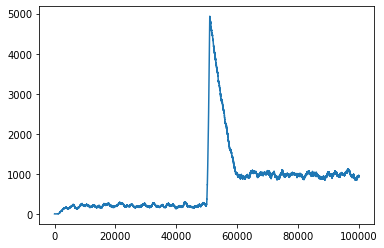

In [43]:
plt.plot(H)

In [51]:
kw = kruskall_wallis_statistic([10000,1000])

H = []
X = list(np.random.normal(0,1,50000)) + list(np.random.normal(1,1,50000))
for x in X :
    kw.push(0,x) 
    kw.push(1,x)
    H.append(kw.H)
   
print(kw.samples[0].S)
print(kw.samples[1].S)
print(kw.samples[0].S + kw.samples[1].S)
print(kw.H)
stats.kruskal(kw.samples[0].osw.OST,kw.samples[1].osw.OST)
# note - this is less broken wrt to true KSW stat since it has less repeated values (normal distribution)
# note - this corresponds to a 1 second window size at 10000 Hz !! - and its pure python !!!

55240543
5264957
60505500
6.051868540940632


KruskalResult(statistic=6.026202574092831, pvalue=0.014095024939197528)

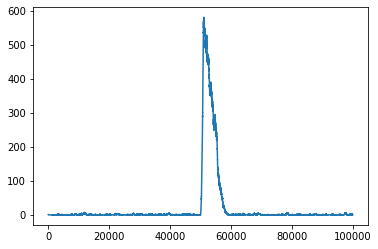

In [50]:
plt.plot(H)

In [159]:

# try a sign test
from scipy.stats import binom
import statsmodels

l = OSW(1000)
s = OSW(100)

R = []
P = []
# X = list(np.random.normal(0,1,50000)) + list(np.random.normal(5,1,50000))
X = list(np.random.poisson(1,50000)) + list(np.random.poisson(2,50000))
for x in X :
    l.push(x) 
    s.push(x)
    mu = (l[ceil(len(l)/2) - 1] + l[floor(len(l)/2)])/2
    below,_ = s.bisect_left(mu)
    above,_ = s.bisect_right(mu)
    above = len(s) - above
    x = min(above,below)
    R.append(above+below)
    P.append(binom.pmf(x,above + below, 0.5))

    



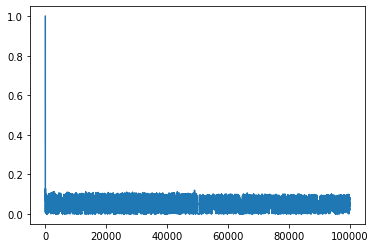

In [160]:
plt.plot(P)

In [100]:
window = OSW(10)
print(window.bisect_left(2))
print(window.bisect_right(2))
window.push(1)
window.push(2)
window.push(2)
window.push(2)
window.push(2)
window.push(3)
window.push(4)

print(window.bisect_left(2))
print(window.bisect_right(2))

(0, None)
(0, None)
(1, 2)
(5, 2)


In [107]:
min(5,5)

5